In [1]:
import sys
sys.path.append("../") # go to parent dir

import jax
import jax.numpy as jnp
import numpy as np
from matplotlib import pyplot as plt
import module.chebyshev_solver as chb

import optax
import module.sampler as samplers

In [2]:
key = jax.random.PRNGKey(0)

In [3]:
solver = chb.Solver(N = 50)
dims = (50,50)
xx = solver.xx
yy = solver.yy
grid = solver.grid

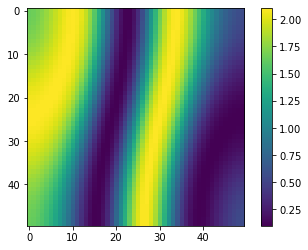

In [4]:
k = -np.sin(yy*1.5*np.pi + xx) + 1.1
plt.imshow(k)
plt.colorbar()
k_cheby = np.linalg.inv(solver.I) @ k.flatten()

key, _ = jax.random.split(key)

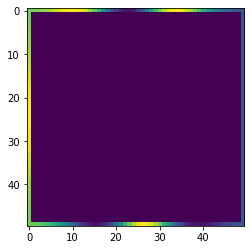

In [6]:
boundary = np.zeros((solver.N,solver.N))
boundary[0,:] = k.reshape(dims)[0,:]
boundary[-1, :] = k.reshape(dims)[-1,:]
boundary[:, 0] = k.reshape(dims)[:,0]
boundary[:, -1] = k.reshape(dims)[0,-1]


dirichlet = boundary
plt.imshow(dirichlet)

In [7]:
sol = solver.solve(k_cheby.flatten(), dirichlet)

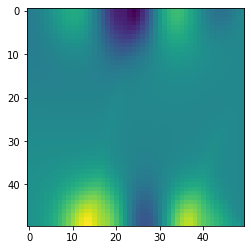

In [8]:
plt.imshow(sol["dx T"].reshape(dims))